## ***Install all the necessary packages***

In [1]:
!pip install beautifulsoup4  
!pip install lxml
!pip install geopy
!pip install folium

# ***Importing all the necessary packages***

In [31]:
## libraries for displaying images
from IPython.display import display_html
#Importing BeautifulSoup for Web Scraping
from bs4 import BeautifulSoup
# library to handle requests
import requests 
# library to handle data in a vectorized manner
import numpy as np 
# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
# plotting library
import folium 
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

## ***Scraping the Wikipedia page for the table of Area and location of Mumbai***

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of neighbourhoods in Mumbai - Wikipedia</title>


Area,Location,Latitude,Longitude
Amboli,"Andheri,Western Suburbs",19.1293,72.8434
"Chakala, Andheri",Western Suburbs,19.111388,72.860833
D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927
Marol,"Andheri,Western Suburbs",19.119219,72.882743
Sahar,"Andheri,Western Suburbs",19.098889,72.867222
Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
Versova,"Andheri,Western Suburbs",19.12,72.82
Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


1.Tranform the data into a pandas dataframe.<br>
2.The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe.<br>3.So let's start by creating an empty dataframe.

In [4]:
# define the dataframe columns
column_names = ['Area', 'Location', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbourhoods = pd.DataFrame(columns=column_names)

Now we are loading the scraped data into the dataframe

In [5]:
dfs = pd.read_html(tab)
neighbourhoods=dfs[0]
neighbourhoods.head()

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270


Use geopy library to get the latitude and longitude values of Mumbai.<br>
In order to define an instance of the geocoder, we need to define a user_agent.<br> We will name our agent ***ny_explorer***, as shown below.

In [6]:
address = 'Mumbai'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai are 19.0759899, 72.8773928.


Create a map of **Mumbai** with **Location** superimposed on top.

In [7]:
map_mumbai = folium.Map(location=[19.0759899,72.8773928],zoom_start=10)

for lat,lng,Area,Location in zip(neighbourhoods['Latitude'],neighbourhoods['Longitude'],neighbourhoods['Area'],neighbourhoods['Location']):
    label = '{}, {}'.format(Location, Area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_mumbai)
map_mumbai

# ***Next, we are going to start utilizing the Foursquare API to explore the different areas of South Mumbai and segment them***

In [8]:
CLIENT_ID = 'DPPGKVRWBWVRFXUGY3E5JCWKODEQ4505UG5PXZUPLEEEJ4UE' # Foursquare ID Masked due to security reasons 
CLIENT_SECRET = 'NFD3FA10QSTE4H1SFE12E2D01U0FADIZJWQNMRDEDRBOO1R2' # Foursquare Secret Masked due to Security reasons
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DPPGKVRWBWVRFXUGY3E5JCWKODEQ4505UG5PXZUPLEEEJ4UE
CLIENT_SECRET:NFD3FA10QSTE4H1SFE12E2D01U0FADIZJWQNMRDEDRBOO1R2


Now since we are interested in only the areas in South Mumbai, so let's slice the original dataframe and create a new dataframe of the South Mumbai data.

In [9]:
southmumbai_data = neighbourhoods[neighbourhoods['Location'] == 'South Mumbai'].reset_index(drop=True)
southmumbai_data.head()

,Area,Location,Latitude,Longitude
0,Agripada,South Mumbai,18.9777,72.8273
1,Altamount Road,South Mumbai,18.9681,72.8095
2,Bhuleshwar,South Mumbai,18.9500,72.8300
3,Breach Candy,South Mumbai,18.9670,72.8050
4,Carmichael Road,South Mumbai,18.9722,72.8113


Let's explore the first Area in our dataframe

In [10]:
southmumbai_data.loc[0, 'Area']

'Agripada'


Get the Area's latitude and longitude values.

In [11]:
Area_latitude = southmumbai_data.loc[0, 'Latitude'] # Area latitude value
Area_longitude = southmumbai_data.loc[0, 'Longitude'] # Area longitude value

Area_name = southmumbai_data.loc[0, 'Area'] # Area name

print('Latitude and longitude values of {} are {}, {}.'.format(Area_name, 
                                                               Area_latitude, 
                                                               Area_longitude))

Latitude and longitude values of Agripada are 18.9777, 72.8273.


Now, let's get the top 100 venues that are in Agripada within a radius of<br>500 meters

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Area_latitude, 
    Area_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=DPPGKVRWBWVRFXUGY3E5JCWKODEQ4505UG5PXZUPLEEEJ4UE&client_secret=NFD3FA10QSTE4H1SFE12E2D01U0FADIZJWQNMRDEDRBOO1R2&v=20180605&ll=18.9777,72.8273&radius=500&limit=100'

Send the GET request and examine the resutls

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '600e4f7d69387b0b1f5fda9b'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4eb6b5ede5fa17fc874e131c-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16a941735',
         'name': 'Bakery',
         'pluralName': 'Bakeries',
         'primary': True,
         'shortName': 'Bakery'}],
       'id': '4eb6b5ede5fa17fc874e131c',
       'location': {'cc': 'IN',
        'country': 'India',
        'distance': 433,
        'formattedAddress': ['India'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 18.97584443166727,
          'lng': 72.8236785218938}],
        'lat': 18.97584443166727,
        'lng': 72.8236785218938},
       'name': 'Celejor',
      

From the Foursquare lab in the previous module, we know that all the information is in the items key.<br> Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Celejor,Bakery,18.975844,72.823679
1,cafe coffee day,Coffee Shop,18.976988,72.824051
2,"Gold Gym IndiaBulls, Lower Parel",Gym,18.981424,72.824900
3,Warden bakery,Bakery,18.980180,72.826118
4,Vedanta Veg Restaurant,Indian Restaurant,18.980548,72.828777


And how many venues were returned by Foursquare?

In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


## ***Let's create a function to repeat the same process to all the nearby Areas in South Mumbai***

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
# return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each Area and create a new dataframe called South Mumbai_venues

In [19]:
SouthMumbai_venues = getNearbyVenues(names=southmumbai_data['Area'],
                                   latitudes=southmumbai_data['Latitude'],
                                   longitudes=southmumbai_data['Longitude']
                                  )

Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
Matunga
Parel
Dava Bazaar


In [20]:
SouthMumbai_venues.head()

,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agripada,18.9777,72.8273,Celejor,18.975844,72.823679,Bakery
1,Agripada,18.9777,72.8273,cafe coffee day,18.976988,72.824051,Coffee Shop
2,Agripada,18.9777,72.8273,"Gold Gym IndiaBulls, Lower Parel",18.981424,72.824900,Gym
3,Agripada,18.9777,72.8273,Warden bakery,18.980180,72.826118,Bakery
4,Agripada,18.9777,72.8273,Vedanta Veg Restaurant,18.980548,72.828777,Indian Restaurant


We get the count of venues by Areas of South Mumbai

In [23]:
SouthMumbai_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Agripada,6,6,6,6,6,6
Altamount Road,7,7,7,7,7,7
Bhuleshwar,14,14,14,14,14,14
Breach Candy,35,35,35,35,35,35
Carmichael Road,16,16,16,16,16,16
Cavel,16,16,16,16,16,16
Churchgate,35,35,35,35,35,35
Cotton Green,4,4,4,4,4,4
Cuffe Parade,2,2,2,2,2,2


In [24]:
print('There are {} uniques categories.'.format(len(SouthMumbai_venues['Venue Category'].unique())))

There are 107 uniques categories.


### ***Analyze Each Area***

In [25]:
# one hot encoding
Southmumbai_onehot = pd.get_dummies(SouthMumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add Area column back to dataframe
Southmumbai_onehot['Area'] = SouthMumbai_venues['Area'] 

# move Area column to the first column
fixed_columns = [Southmumbai_onehot.columns[-1]] + list(Southmumbai_onehot.columns[:-1])
Southmumbai_onehot = Southmumbai_onehot[fixed_columns]

Southmumbai_onehot.head()

,Area,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bus Station,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Gym,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Office,Other Great Outdoors,Outlet Mall,Park,Parsi Restaurant,Performing Arts Venue,Pizza Place,Playground,Plaza,Pub,Recreation Center,Resort,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Souvenir Shop,Spa,Steakhouse,Tea Room,Theater,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Agripada,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agripada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agripada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agripada,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agripada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***Next, let's group rows by Area and by taking the mean of the frequency of occurrence of each category***

In [26]:
southmumbai_grouped = Southmumbai_onehot.groupby('Area').mean().reset_index()
southmumbai_grouped

,Area,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bus Station,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Gym,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Office,Other Great Outdoors,Outlet Mall,Park,Parsi Restaurant,Performing Arts Venue,Pizza Place,Playground,Plaza,Pub,Recreation Center,Resort,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Souvenir Shop,Spa,Steakhouse,Tea Room,Theater,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Agripada,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.166667,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.166667,0.000000,0.000000,0.000000,0.00,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Altamount Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.0000,0.000000,0.000000,0.000000,0.000000,0.142857,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Bhuleshwar,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.071429,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.071429,0.000000,0.00,0.071429,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.071429,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0

Lets print each Area along with the top 5 most common venues.

In [27]:
num_top_venues = 5

for hood in southmumbai_grouped['Area']:
    print("----"+hood+"----")
    temp = southmumbai_grouped[southmumbai_grouped['Area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agripada----
               venue  freq
0             Bakery  0.33
1  Indian Restaurant  0.17
2        Coffee Shop  0.17
3         Restaurant  0.17
4                Gym  0.17


----Altamount Road----
               venue  freq
0               Café  0.29
1  Indian Restaurant  0.14
2             Bakery  0.14
3        Coffee Shop  0.14
4            Theater  0.14


----Bhuleshwar----
               venue  freq
0  Indian Restaurant  0.50
1        Cheese Shop  0.07
2         Restaurant  0.07
3             Market  0.07
4     Ice Cream Shop  0.07


----Breach Candy----
                  venue  freq
0                  Café  0.14
1      Department Store  0.06
2                Bakery  0.06
3        Sandwich Place  0.06
4  Fast Food Restaurant  0.06


----Carmichael Road----
                  venue  freq
0  Fast Food Restaurant  0.12
1    Chinese Restaurant  0.12
2        Ice Cream Shop  0.12
3         Shopping Mall  0.06
4                  Café  0.06


----Cavel----
               venue  freq

Let's put that into a pandas dataframe<br>
First, let's write a function to sort the venues in descending order.

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each <br>Area.

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
MumbaiArea_venues_sorted= pd.DataFrame(columns=columns)
MumbaiArea_venues_sorted['Area'] = southmumbai_grouped['Area']

for ind in np.arange(southmumbai_grouped.shape[0]):
    MumbaiArea_venues_sorted.iloc[ind, 1:] = return_most_common_venues(southmumbai_grouped.iloc[ind, :], num_top_venues)

MumbaiArea_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,Bakery,Indian Restaurant,Coffee Shop,Gym,Restaurant,Food Court,Diner,Donut Shop,Dumpling Restaurant,Electronics Store
1,Altamount Road,Café,Indian Restaurant,Coffee Shop,Bakery,Theater,Sandwich Place,Food,Diner,Donut Shop,Dumpling Restaurant
2,Bhuleshwar,Indian Restaurant,Restaurant,Cheese Shop,Fast Food Restaurant,Food,Ice Cream Shop,Market,American Restaurant,Tea Room,Concert Hall
3,Breach Candy,Café,Coffee Shop,Bakery,Sandwich Place,Fast Food Restaurant,Department Store,Dessert Shop,Men's Store,Japanese Restaurant,Italian Restaurant
4,Carmichael Road,Ice Cream Shop,Chinese Restaurant,Fast Food Restaurant,Food Truck,Snack Place,Outlet Mall,Café,Sandwich Place,Shopping Mall,Deli / Bodega


## Cluster Neighborhoods<br>
1.First we use the elbow method to find the optimal number of clusters.<br>
2.Run k-means with the optimal number of clusters to cluster the Areas.

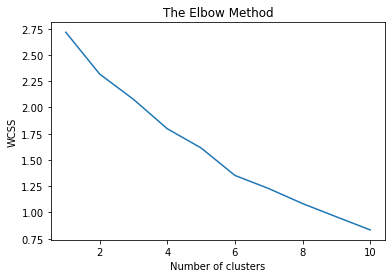

In [34]:
southmumbai_grouped_clustering = southmumbai_grouped.drop('Area', 1)

#Usingthe elbow method to find the optimal number of clusters using WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(southmumbai_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As per the above diagram we choose number of clusters as 6

In [35]:
# run k-means clustering
kclusters=6

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(southmumbai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 3, 3, 0, 3, 5, 1, 3], dtype=int32)

***Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.***

In [36]:
# add clustering labels
MumbaiArea_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [37]:
southmumbai_merged = southmumbai_data

# merge southmumbai_grouped with southmumbai_data to add latitude/longitude for each Area
southmumbai_merged = southmumbai_merged.join(MumbaiArea_venues_sorted.set_index('Area'), on='Area',)
southmumbai_merged.dropna(0,inplace=True)#Removing if any clusters with NA is present

southmumbai_merged # check the last columns!

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,South Mumbai,18.977700,72.827300,0.0,Bakery,Indian Restaurant,Coffee Shop,Gym,Restaurant,Food Court,Diner,Donut Shop,Dumpling Restaurant,Electronics Store
1,Altamount Road,South Mumbai,18.968100,72.809500,3.0,Café,Indian Restaurant,Coffee Shop,Bakery,Theater,Sandwich Place,Food,Diner,Donut Shop,Dumpling Restaurant
2,Bhuleshwar,South Mumbai,18.950000,72.830000,0.0,Indian Restaurant,Restaurant,Cheese Shop,Fast Food Restaurant,Food,Ice Cream Shop,Market,American Restaurant,Tea Room,Concert Hall
3,Breach Candy,South Mumbai,18.967000,72.805000,3.0,Café,Coffee Shop,Bakery,Sandwich Place,Fast Food Restaurant,Department Store,Dessert Shop,Men's Store,Japanese Restaurant,Italian Restaurant
4,Carmichael Road,South Mumbai,18.972200,72.811300,3.0,Ice Cream Shop,Chinese Restaurant,Fast Food Restaurant,Food Truck,Snack Place,Outlet Mall,Café,Sandwich Place,Shopping Mall,Deli / Bodega
5,Cavel,South Mumbai,18.947400,72.827200,0.0,Indian Restaurant,Café,Bakery,Cheese Shop,Chinese Restaurant,Coffee Shop,Bar,Train Station,Movie Theater,Multiplex
6,Churchgate,South Mumbai,18.930000,72.820000,3.0,Hotel,Italian Restaurant,Restaurant,Wine Bar,Coffee Shop,Indian Restaurant,Sandwich Place,Diner,Mexican Restaurant,Mediterranean Restaurant
7,Cotton Green,South Mumbai,18.986209,72.844076,5.0,Whisky Bar,Train Station,Plaza,Bakery,Yoga Studio,Food Court,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant
8,Cuffe Parade,South Mumbai,18.910000,72.810000,1.0,Indian Restaurant,Garden,Food Court,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant
9,Cumbala Hill,South Mumbai,18.965833,72.805833,3.0,Café,Coffee Shop,Fast Food Restaurant,Concert Hall,Men's Store,Japanese Restaurant,Italian Restaurant,French Restaurant,Dessert Shop,Department Store


Finally, let's visualize the resulting clusters

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(southmumbai_merged['Latitude'], southmumbai_merged['Longitude'], southmumbai_merged['Area'], southmumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### ***Examine Clusters***<br>
Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

### **CLUSTER 1**

In [47]:
southmumbai_merged.loc[southmumbai_merged['Cluster Labels'] == 0.0, southmumbai_merged.columns[[0] + list(range(1, southmumbai_merged.shape[1]))]]

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,South Mumbai,18.977700,72.827300,0.0,Bakery,Indian Restaurant,Coffee Shop,Gym,Restaurant,Food Court,Diner,Donut Shop,Dumpling Restaurant,Electronics Store
2,Bhuleshwar,South Mumbai,18.950000,72.830000,0.0,Indian Restaurant,Restaurant,Cheese Shop,Fast Food Restaurant,Food,Ice Cream Shop,Market,American Restaurant,Tea Room,Concert Hall
5,Cavel,South Mumbai,18.947400,72.827200,0.0,Indian Restaurant,Café,Bakery,Cheese Shop,Chinese Restaurant,Coffee Shop,Bar,Train Station,Movie Theater,Multiplex
10,Currey Road,South Mumbai,18.994000,72.833000,0.0,Indian Restaurant,Coffee Shop,Plaza,Maharashtrian Restaurant,Food,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store
11,Dhobitalao,South Mumbai,18.943300,72.828600,0.0,Indian Restaurant,Bakery,Bar,Café,Boutique,Multiplex,Movie Theater,Pizza Place,Mexican Restaurant,Coffee Shop
13,Kala Ghoda,South Mumbai,18.930700,72.833100,0.0,Indian Restaurant,Café,Coffee Shop,Seafood Restaurant,Fast Food Restaurant,Dessert Shop,History Museum,Hotel,Chinese Restaurant,Boutique
17,Mahim,South Mumbai,19.035000,72.840000,0.0,Indian Restaurant,Chinese Restaurant,Café,Fast Food Restaurant,Seafood Restaurant,Bakery,Bar,Beach,Breakfast Spot,Coffee Shop
20,Marine Lines,South Mumbai,18.944700,72.824400,0.0,Indian Restaurant,Bakery,Café,Jewelry Store,Multiplex,Coffee Shop,Clothing Store,Chinese Restaurant,Mexican Restaurant,Bridal Shop
23,Prabhadevi,South Mumbai,19.016600,72.829500,0.0,Indian Restaurant,Café,Electronics Store,Smoke Shop,Bakery,Chinese Restaurant,Coffee Shop,Convenience Store,Dessert Shop,Fast Food Restaurant
24,Sion,South Mumbai,19.040000,72.860000,0.0,Indian Restaurant,Snack Place,Gym,Movie Theater,Pizza Place,Plaza,Sandwich Place,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Bar


## **CLUSTER 2**

In [48]:
southmumbai_merged.loc[southmumbai_merged['Cluster Labels'] == 1.0, southmumbai_merged.columns[[0] + list(range(1, southmumbai_merged.shape[1]))]]

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Cuffe Parade,South Mumbai,18.91,72.81,1.0,Indian Restaurant,Garden,Food Court,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant


## **CLUSTER 3**

In [41]:
southmumbai_merged.loc[southmumbai_merged['Cluster Labels'] == 2.0, southmumbai_merged.columns[[0] + list(range(1, southmumbai_merged.shape[1]))]]

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Malabar Hill,South Mumbai,18.950000,72.795000,2.0,Indian Restaurant,Lighthouse,Convenience Store,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Gourmet Shop,Goan Restaurant,Hotel,Diner
25,Walkeshwar,South Mumbai,18.947596,72.795957,2.0,Indian Restaurant,Lighthouse,Ice Cream Shop,Convenience Store,Coffee Shop,Department Store,Gourmet Shop,Field,Hotel,History Museum


# **CLUSTER 4**

In [49]:
southmumbai_merged.loc[southmumbai_merged['Cluster Labels'] == 3.0, southmumbai_merged.columns[[0] + list(range(1, southmumbai_merged.shape[1]))]]

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Altamount Road,South Mumbai,18.968100,72.809500,3.0,Café,Indian Restaurant,Coffee Shop,Bakery,Theater,Sandwich Place,Food,Diner,Donut Shop,Dumpling Restaurant
3,Breach Candy,South Mumbai,18.967000,72.805000,3.0,Café,Coffee Shop,Bakery,Sandwich Place,Fast Food Restaurant,Department Store,Dessert Shop,Men's Store,Japanese Restaurant,Italian Restaurant
4,Carmichael Road,South Mumbai,18.972200,72.811300,3.0,Ice Cream Shop,Chinese Restaurant,Fast Food Restaurant,Food Truck,Snack Place,Outlet Mall,Café,Sandwich Place,Shopping Mall,Deli / Bodega
6,Churchgate,South Mumbai,18.930000,72.820000,3.0,Hotel,Italian Restaurant,Restaurant,Wine Bar,Coffee Shop,Indian Restaurant,Sandwich Place,Diner,Mexican Restaurant,Mediterranean Restaurant
9,Cumbala Hill,South Mumbai,18.965833,72.805833,3.0,Café,Coffee Shop,Fast Food Restaurant,Concert Hall,Men's Store,Japanese Restaurant,Italian Restaurant,French Restaurant,Dessert Shop,Department Store
14,Kemps Corner,South Mumbai,18.962900,72.805400,3.0,Café,Dessert Shop,Bookstore,Fast Food Restaurant,Bakery,Salon / Barbershop,Coffee Shop,Concert Hall,Bus Station,Pizza Place
15,Lower Parel,South Mumbai,18.995278,72.830000,3.0,Indian Restaurant,Italian Restaurant,Shopping Mall,Office,Coffee Shop,Clothing Store,Pub,Recreation Center,Fast Food Restaurant,Café
19,Marine Drive,South Mumbai,18.944000,72.823000,3.0,Indian Restaurant,Italian Restaurant,Café,Scenic Lookout,Lounge,Chinese Restaurant,Clothing Store,Jewelry Store,Bridal Shop,Bakery
21,Mumbai Central,South Mumbai,18.969700,72.819400,3.0,Department Store,Fast Food Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Pizza Place,Chinese Restaurant,Movie Theater,Juice Bar,Snack Place,Restaurant
22,Nariman Point,South Mumbai,18.926000,72.823000,3.0,Indian Restaurant,Italian Restaurant,Theater,Hotel,Restaurant,Chaat Place,Mediterranean Restaurant,Diner,Sandwich Place,Performing Arts Venue


## **CLUSTER 5**

In [50]:
southmumbai_merged.loc[southmumbai_merged['Cluster Labels'] == 4.0, southmumbai_merged.columns[[0] + list(range(1, southmumbai_merged.shape[1]))]]

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Dongri,South Mumbai,19.283333,72.783333,4.0,Beach,Indian Restaurant,Playground,Resort,Bus Station,Food,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant


## **CLUSTER 6**

In [51]:
southmumbai_merged.loc[southmumbai_merged['Cluster Labels'] == 5.0, southmumbai_merged.columns[[0] + list(range(1, southmumbai_merged.shape[1]))]]

,Area,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Cotton Green,South Mumbai,18.986209,72.844076,5.0,Whisky Bar,Train Station,Plaza,Bakery,Yoga Studio,Food Court,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant
28,Parel,South Mumbai,18.990000,72.840000,5.0,Indian Restaurant,Asian Restaurant,Whisky Bar,Plaza,Food Court,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store
